<a href="https://colab.research.google.com/github/nafisa2023/Cardiohealth-Business-Report/blob/main/Business_Report_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Database downloaded and saved to ./cardiohealth.db

stablishing connection with database...
Connection stablished with database

Loading data from Database...........
Loading data: successful

Starting Data Cleaning...........
Row count before cleaning: 70000
Row count after age cleaning: 60279
Data cleaning Done


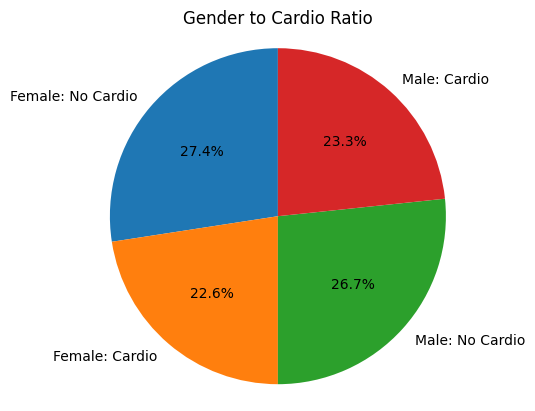

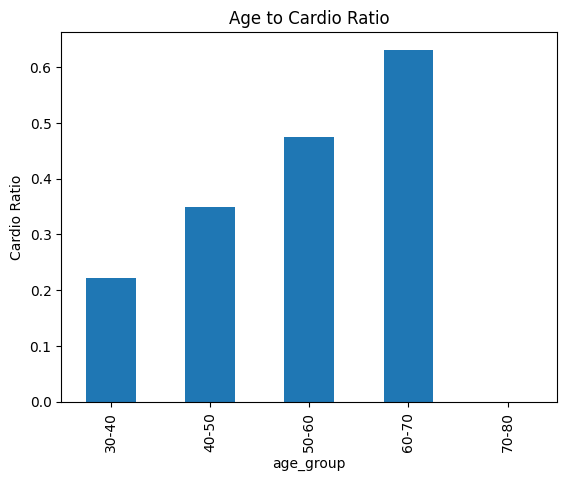

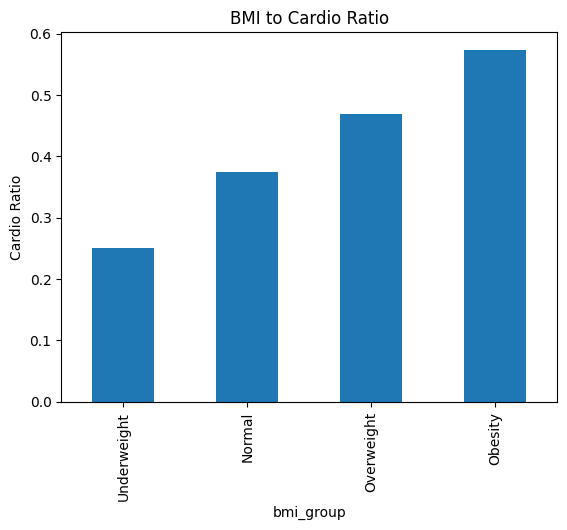

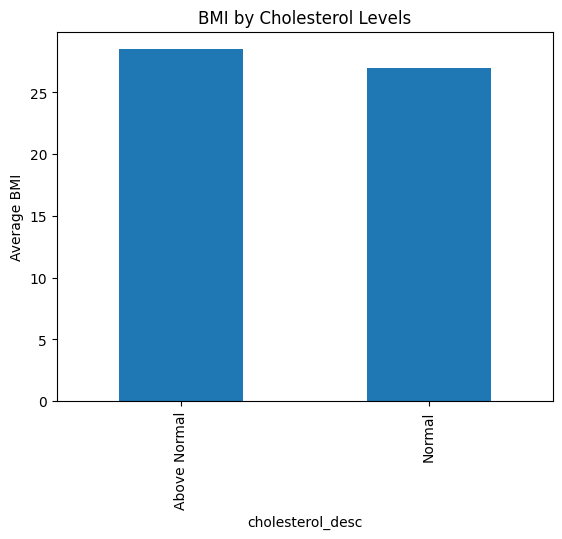

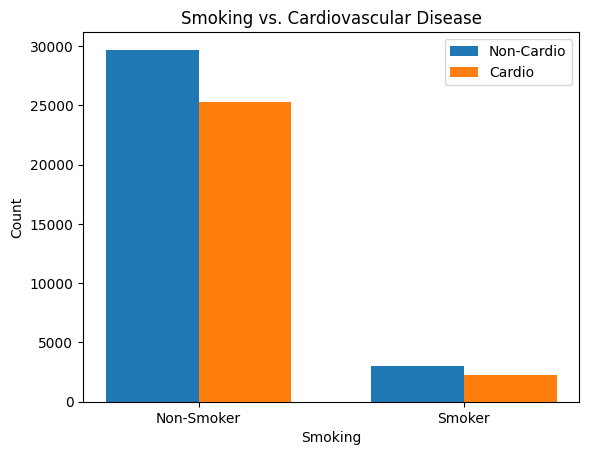

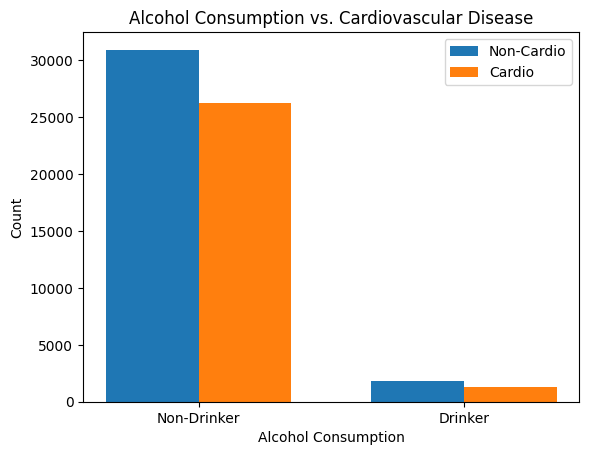

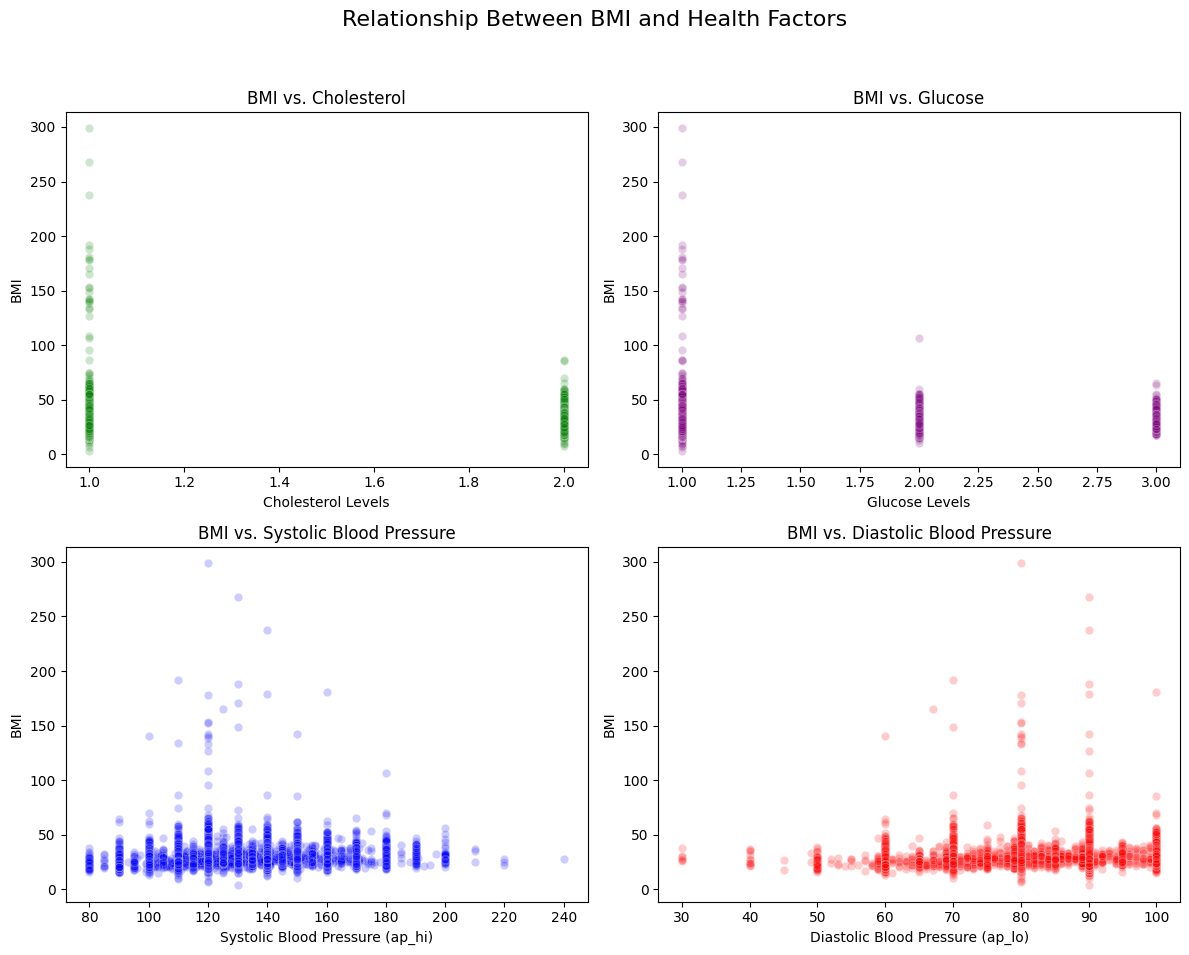

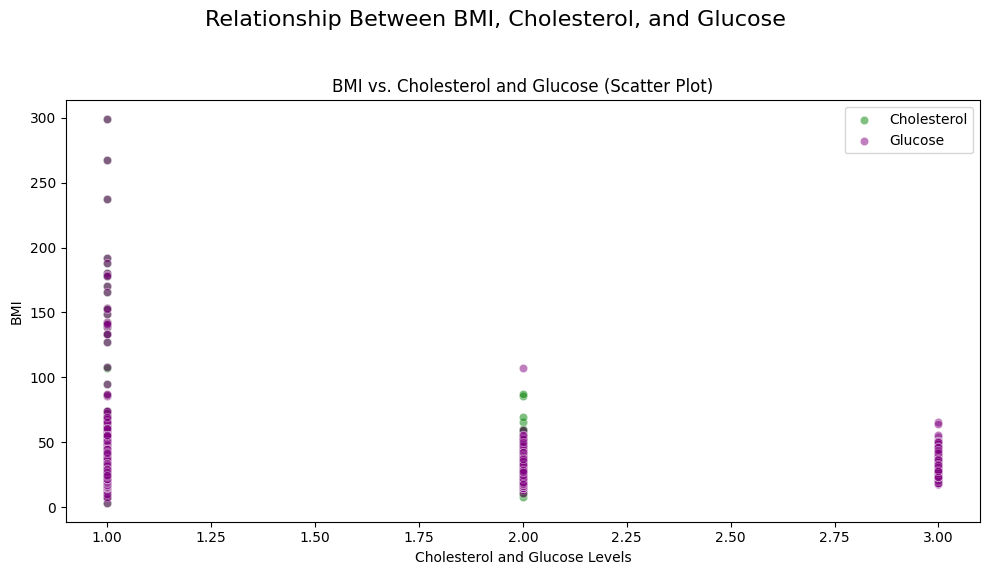

In [ ]:
# Import libraries for
import sqlite3         # Connecting to the SQLite database
import pandas as pd    # Data manipulation and analysis
import numpy as np     # Numerical operations
import matplotlib.pyplot as plt  # Creating plots and charts
import seaborn as sns  # Enhanced data visualization
import requests        # Making HTTP requests to web services

def download_database_from_github(url, local_path):
    """
    Download the database file cardiohealth.db from GitHub and save it locally.
    :param url: The URL of the database file (cardiohealth.db) on GitHub.
    :param local_path: This is the path to save the downloaded file.
    """
    print('Downloading database from github...')
    response = requests.get(url)
    with open(local_path, 'wb') as file:
        file.write(response.content)
    print(f"Database downloaded and saved to {local_path}")

def connect_to_database(db_file):
    """
    Connect to the cardiohealth.db SQLite database.
    :param db_file: This is the path to the SQLite database file.
    :return: SQLite connection object.
    """
    print('\nstablishing connection with database...')
    conn = sqlite3.connect(db_file)
    print('Connection stablished with database')
    return conn

# This is the function to load data from the cardiohealth.db database into a pandas DataFrame
def load_data_from_db(conn):
    print('\nLoading data from Database...........')
    # Query to get the table name from the cardiohealth.db database
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    table_name = conn.execute(query).fetchone()[0]

    # Read data from the specified table into a DataFrame
    df = pd.read_sql_query(f"SELECT * from {table_name}", conn)
    print('Loading data: successful')
    return df

# Function for cleaning the data
def data_cleaning(df):
    print("\nStarting Data Cleaning...........")

    # Print row count before cleaning
    print(f"Row count before cleaning: {len(df)}")

    # Clean a row if smoke is not 0 or 1
    df = df[(df['smoke'] == 0) | (df['smoke'] == 1)]

    # Clean a row if Cholesterol is not 0 or 1 or 2
    df = df[(df['cholesterol'] == 0) | (df['cholesterol'] == 1) | (df['cholesterol'] == 2)]

    # Clean a row if Glucose level is not either 1, 2, or 3
    df = df[(df['gluc'] == 1) | (df['gluc'] == 2) | (df['gluc'] == 3)]

    # Clean a row if smoke is not either 0 or 1
    df = df[(df['smoke'] == 0) | (df['smoke'] == 1)]

    # Clean a row if alco is not either 0 or 1
    df = df[(df['alco'] == 0) | (df['alco'] == 1)]

    # Clean a row if active is not either 0 or 1
    df = df[(df['active'] == 0) | (df['active'] == 1)]

    # Clean a row if cardio is not either 0 or 1
    df = df[(df['cardio'] == 0) | (df['cardio'] == 1)]

    # Clean a row if weight is more than 700kg and less than 0kg
    df = df[(df['weight'] >= 0) & (df['weight'] <= 700)]

    # Clean a row if ap_hi is more than 250 and less than 80
    df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)]

    # Clean a row if ap_lo less than 30 and more than 100
    df = df[(df['ap_lo'] >= 30) & (df['ap_lo'] <= 100)]

    # Clean a row if Height less than 50cm and more than 300 cm
    df = df[(df['height'] >= 50) & (df['height'] <= 300)]

    # Clean a row if age less than 1 day and more than 109575 days
    df = df[(df['age'] >= 1) & (df['age'] <= 109575)]

    # Print row count after cleaning
    print(f"Row count after age cleaning: {len(df)}")
    print("Data cleaning Done")

    return df

# This is the function to calculate the gender to cardio ratio and visualize it with a pie chart
def gender_to_cardio_ratio(df):
    # Group the data by gender and compute the mean of cardio column for each gender
    gender_cardio = df.groupby('gender')['cardio'].mean()

    # Define the labels for each section of the pie chart
    labels = ['Female: No Cardio', 'Female: Cardio', 'Male: No Cardio', 'Male: Cardio']

    # Calculate the sizes (percentages) for each section of the pie chart based on the cardio mean for each gender
    sizes = [
        (1 - gender_cardio[1]) * 100,  # Percentage of females without cardiovascular diseases
        gender_cardio[1] * 100,        # Percentage of females with cardiovascular diseases
        (1 - gender_cardio[2]) * 100,  # Percentage of males without cardiovascular diseases
        gender_cardio[2] * 100         # Percentage of males with cardiovascular diseases
    ]

    # Plot the pie chart with the specified sizes and labels
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    # Ensure that the pie is drawn as a circle
    plt.axis('equal')

    # Set the title for the pie chart
    plt.title('Gender to Cardio Ratio')

    # Display the pie chart
    plt.show()


# Function to visualize the age to cardio ratio using a bar chart
def age_to_cardio_ratio(df):
    # Define age bins in years for categorizing the patients' age
    bins = [30, 40, 50, 60, 70, 80]

    # Define corresponding labels for each age bin
    labels = ['30-40', '40-50', '50-60', '60-70', '70-80']

    # Convert age from days to years and create a new column 'age_group'
    # to categorize each patient's age using the defined bins and labels
    df['age_group'] = pd.cut(df['age']/365, bins=bins, labels=labels, right=False)

    # Group the data by age group and compute the mean of the cardio column for each age group
    age_groups = df.groupby('age_group')['cardio'].mean()

    # Plot the age groups against their respective cardio mean using a bar chart
    age_groups.plot(kind='bar', title='Age to Cardio Ratio')

    # Set the y-axis label
    plt.ylabel('Cardio Ratio')

    # Display the bar chart
    plt.show()


# Function to visualize the BMI (Body Mass Index) to cardio ratio using a bar chart
def bmi_to_cardio_ratio(df):
    # Calculate BMI for each patient using the formula: weight (kg) / (height (m))^2
    # and store the results in a new column named 'bmi'
    df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

    # Define BMI categories based on widely accepted cutoffs
    bins = [10, 18.5, 25, 30, 40]

    # Define labels corresponding to the BMI categories
    labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']

    # Categorize each patient's BMI using the defined bins and labels
    # and create a new column 'bmi_group'
    df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=True)

    # Group the data by BMI category and compute the mean of the cardio column for each BMI group
    bmi_groups = df.groupby('bmi_group')['cardio'].mean()

    # Plot the BMI categories against their respective cardio mean using a bar chart
    bmi_groups.plot(kind='bar', title='BMI to Cardio Ratio')

    # Set the y-axis label
    plt.ylabel('Cardio Ratio')

    # Display the bar chart
    plt.show()


# Function to visualize the average BMI for each cholesterol level using a bar chart
def bmi_cholesterol_cardio_ratio(df):
    # Mapping cholesterol levels to human-readable descriptions
    # Level 1 is normal, level 2 is above normal, and level 3 is well above normal
    cholesterol_map = {
        1: 'Normal',
        2: 'Above Normal',
        3: 'Well Above Normal'
    }

    # Apply the mapping to the 'cholesterol' column to create a new column 'cholesterol_desc'
    # that contains descriptive labels for cholesterol levels
    df['cholesterol_desc'] = df['cholesterol'].map(cholesterol_map)

    # Group the data by cholesterol description and compute the average BMI for each group
    avg_bmi_by_chol = df.groupby('cholesterol_desc')['bmi'].mean()

    # Plot the average BMI values for each cholesterol level using a bar chart
    avg_bmi_by_chol.plot(kind='bar', title='BMI by Cholesterol Levels')

    # Set the y-axis label to indicate that we are visualizing average BMI values
    plt.ylabel('Average BMI')

    # Display the plotted bar chart
    plt.show()


# Function to visualize the relationship between smoking habits and the presence of cardiovascular diseases
def smoke_cardio_ratio(df):
    # Group the data by 'smoke' and 'cardio' columns, then count the number of occurrences for each combination
    smoke_cardio = df.groupby(['smoke', 'cardio'])['cardio'].count().unstack()

    # Replace any NaN values with 0, this may occur if there's no representation for a certain group
    smoke_cardio = smoke_cardio.fillna(0)

    # Labels for the x-axis representing the two groups: Non-Smokers and Smokers
    labels = ['Non-Smoker', 'Smoker']

    # Extract counts of people without cardiovascular diseases (denoted by 'cardio' value 0)
    non_cardio_counts = smoke_cardio[0]

    # Extract counts of people with cardiovascular diseases (denoted by 'cardio' value 1)
    cardio_counts = smoke_cardio[1]

    # Set the width of each bar in the bar chart
    width = 0.35
    # Create an array of positions for each group to be used in the bar chart
    x = np.arange(len(labels))

    # Plot bars for people without cardiovascular diseases (Non-Cardio) for each smoking group
    plt.bar(x - width/2, non_cardio_counts, width, label='Non-Cardio')

    # Plot bars for people with cardiovascular diseases (Cardio) for each smoking group
    plt.bar(x + width/2, cardio_counts, width, label='Cardio')

    # Set labels for the x-axis and y-axis, and the title of the bar chart
    plt.xlabel('Smoking')
    plt.ylabel('Count')
    plt.title('Smoking vs. Cardiovascular Disease')

    # Set the tick labels for the x-axis using the 'labels' list
    plt.xticks(x, labels)

    # Display the legend for the bar chart to denote which bars correspond to Cardio and Non-Cardio groups
    plt.legend()

    # Render the bar chart
    plt.show()



# Function to visualize the relationship between alcohol consumption habits and the presence of cardiovascular diseases
def alcohol_cardio_ratio(df):
    # Group the data by 'alco' (alcohol consumption) and 'cardio' columns.
    # Then count the number of occurrences for each combination (e.g., drinker with cardio, non-drinker without cardio, etc.)
    alcohol_cardio = df.groupby(['alco', 'cardio'])['cardio'].count().unstack()

    # If certain combinations have no representation in the dataset, NaN values may arise.
    # These are replaced with 0 for visualization clarity.
    alcohol_cardio = alcohol_cardio.fillna(0)

    # Labels for the x-axis representing the two groups: Non-Drinkers and Drinkers
    labels = ['Non-Drinker', 'Drinker']

    # Extract counts of people without cardiovascular diseases (denoted by 'cardio' value 0)
    non_cardio_counts = alcohol_cardio[0]

    # Extract counts of people with cardiovascular diseases (denoted by 'cardio' value 1)
    cardio_counts = alcohol_cardio[1]

    # Define the width of each bar in the bar chart
    width = 0.35
    # Create an array of positions for each group to be used in the bar chart
    x = np.arange(len(labels))

    # Plot bars for people without cardiovascular diseases (Non-Cardio) for each alcohol consumption group
    plt.bar(x - width/2, non_cardio_counts, width, label='Non-Cardio')

    # Plot bars for people with cardiovascular diseases (Cardio) for each alcohol consumption group
    plt.bar(x + width/2, cardio_counts, width, label='Cardio')

    # Set labels for the x-axis and y-axis, and the title of the bar chart
    plt.xlabel('Alcohol Consumption')
    plt.ylabel('Count')
    plt.title('Alcohol Consumption vs. Cardiovascular Disease')

    # Set the tick labels for the x-axis using the 'labels' list
    plt.xticks(x, labels)

    # Display the legend for the bar chart to denote which bars correspond to Cardio and Non-Cardio groups
    plt.legend()

    # Render the bar chart
    plt.show()



# Function to visualize the relationship between BMI and various health factors including
# Cholesterol, Glucose, and both Systolic and Diastolic Blood Pressure.
def bmi_related_factors(df):
    # Calculate the Body Mass Index (BMI) for each entry in the dataframe.
    df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

    # Initialize a 2x2 grid of subplots.
    # `fig` refers to the entire figure or collection of plots.
    # `axes` is a 2D array where each element corresponds to an individual plot (or "axis") on the grid.
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Set the main title for the entire figure.
    fig.suptitle('Relationship Between BMI and Health Factors', fontsize=16)

    # Plotting the relationship between BMI and Cholesterol on the top-left subplot (axes[0, 0]).
    sns.scatterplot(x='cholesterol', y='bmi', data=df, ax=axes[0, 0], alpha=0.2, color='green')
    # Setting title, x-axis, and y-axis labels for the individual subplot.
    axes[0, 0].set_title('BMI vs. Cholesterol')
    axes[0, 0].set_xlabel('Cholesterol Levels')
    axes[0, 0].set_ylabel('BMI')

    # Plotting BMI vs. Glucose on the top-right subplot (axes[0, 1]).
    sns.scatterplot(x='gluc', y='bmi', data=df, ax=axes[0, 1], alpha=0.2, color='purple')
    axes[0, 1].set_title('BMI vs. Glucose')
    axes[0, 1].set_xlabel('Glucose Levels')
    axes[0, 1].set_ylabel('BMI')

    # Plotting BMI vs. Systolic Blood Pressure on the bottom-left subplot (axes[1, 0]).
    sns.scatterplot(x='ap_hi', y='bmi', data=df, ax=axes[1, 0], alpha=0.2, color='blue')
    axes[1, 0].set_title('BMI vs. Systolic Blood Pressure')
    axes[1, 0].set_xlabel('Systolic Blood Pressure (ap_hi)')
    axes[1, 0].set_ylabel('BMI')

    # Plotting BMI vs. Diastolic Blood Pressure on the bottom-right subplot (axes[1, 1]).
    sns.scatterplot(x='ap_lo', y='bmi', data=df, ax=axes[1, 1], alpha=0.2, color='red')
    axes[1, 1].set_title('BMI vs. Diastolic Blood Pressure')
    axes[1, 1].set_xlabel('Diastolic Blood Pressure (ap_lo)')
    axes[1, 1].set_ylabel('BMI')

    # Adjusting the layout of the subplots to avoid overlap between plots, labels, and titles.
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Display the complete figure with all its subplots.
    plt.show()



# Function to visualize the relationship between BMI, Cholesterol, and Glucose in a combined manner.
def bmi_related_factors_combined(df):
    # Calculate the Body Mass Index (BMI) for each individual in the dataset.
    # BMI is calculated as weight (in kg) divided by the square of height (in meters).
    df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

    # Initialize a single subplot.
    # `fig` represents the entire figure, and `axes` refers to the individual plot within that figure.
    fig, axes = plt.subplots(1, 1, figsize=(10, 6))

    # Set the main title for the figure.
    fig.suptitle('Relationship Between BMI, Cholesterol, and Glucose', fontsize=16)

    # Using seaborn's scatterplot function to plot BMI vs. Cholesterol.
    # The plot will be displayed on the previously defined axes.
    sns.scatterplot(x='cholesterol', y='bmi', data=df, ax=axes, alpha=0.5, color='green', label='Cholesterol')

    # Using seaborn's scatterplot function again on the same axes to overlay BMI vs. Glucose.
    # This will result in two scatter plots being visualized on the same plot.
    sns.scatterplot(x='gluc', y='bmi', data=df, ax=axes, alpha=0.5, color='purple', label='Glucose')

    # Setting title, x-axis, and y-axis labels for the combined scatter plot.
    axes.set_title('BMI vs. Cholesterol and Glucose (Scatter Plot)')
    axes.set_xlabel('Cholesterol and Glucose Levels')
    axes.set_ylabel('BMI')

    # Display the legend to differentiate between the two scatter plots.
    axes.legend()

    # Adjust the layout to ensure titles, labels, and plots do not overlap.
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Render the visualization.
    plt.show()




def main():
    # Specify the URL of the SQLite database file on GitHub and a local path to save it
    database_url = "https://github.com/nafisa2023/Business-Report-Notebook2/blob/main/cardiohealth.db?raw=true"
    local_database_file = "./cardiohealth.db"

    # Download the database from GitHub
    download_database_from_github(database_url, local_database_file)

    # Connect to the SQLite database
    conn = connect_to_database(local_database_file)

    # Load data from the database into a DataFrame
    df = load_data_from_db(conn)

    # Data Cleaning
    df = data_cleaning(df)

    # Visualization
    gender_to_cardio_ratio(df)
    age_to_cardio_ratio(df)
    bmi_to_cardio_ratio(df)
    bmi_cholesterol_cardio_ratio(df)
    smoke_cardio_ratio(df)
    alcohol_cardio_ratio(df)
    bmi_related_factors(df)
    bmi_related_factors_combined(df)

# Check if the script is being run as the main program
if __name__ == '__main__':
    # If it is, execute the main function
    main()